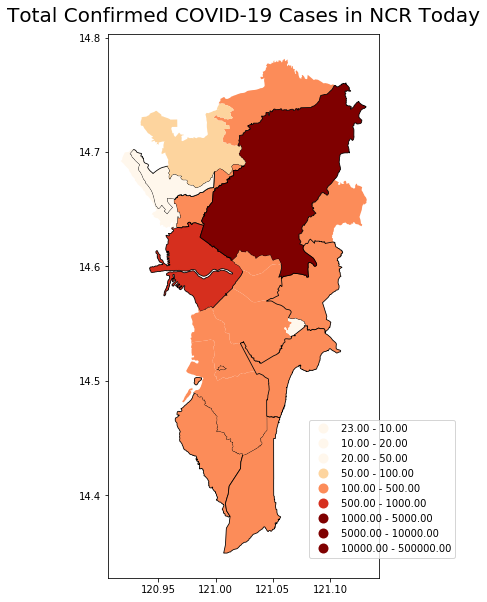

In [47]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import mysql.connector
import mapclassify
import descartes

#Connects to the db server
data = mysql.connector.connect(
    host="myrds1.cijcu6ghykxh.ap-southeast-1.rds.amazonaws.com",
    user="myrds",
    passwd="admin123",
    database="myrds1"
)

cursor = data.cursor()
cursor.execute("SELECT city_mun_res, COUNT(city_mun_res) FROM casesByNCR GROUP BY city_mun_res HAVING COUNT(city_mun_res) > 1;")
result = cursor.fetchall()

df = pd.DataFrame(result, columns=['city_mun_res','COUNT(city_mun_res)'])
df.rename(columns={'city_mun_res': 'City','COUNT(city_mun_res)':'Cases_per_City'}, inplace=True)
df = df.set_index('City')
df.drop(["Davao City",""], inplace=True)

ncr_cities = gpd.read_file('NCR_Map/NCR_PH.shp')
ncr_cities.rename(columns={'name_2':'City'}, inplace=True)


# #Changes the Cities name.
ncr_cities.replace('Valenzuela', 'City of Valenzuela', inplace=True)
ncr_cities.replace('San Juan', 'City of San Juan', inplace=True)
ncr_cities.replace('Taguig', 'Taguig City', inplace=True)
ncr_cities.replace('Pateros', 'Pateros', inplace=True)
ncr_cities.replace('Quezon City', 'Quezon City', inplace=True)
ncr_cities.replace('Pasay City', 'Pasay City',inplace=True)
ncr_cities.replace('Pasig City', 'City of Pasig', inplace=True)
ncr_cities.replace('Parañaque', 'City of Parañaque', inplace=True)
ncr_cities.replace('Navotas', 'City of Navotas', inplace=True)
ncr_cities.replace('Marikina', 'City of Marikina', inplace=True)
ncr_cities.replace('Muntinlupa', 'City of Muntinlupa', inplace=True)
ncr_cities.replace('Mandaluyong', 'City of Mandaluyong', inplace=True)
ncr_cities.replace('Manila', 'City of Manila', inplace=True)
ncr_cities.replace('Makati City', 'City of Makati', inplace=True)
ncr_cities.replace('Malabon', 'City of Malabon', inplace=True)
ncr_cities.replace('Las Piñas', 'City of Las Piñas', inplace=True)
ncr_cities.replace('Kalookan City', 'Caloocan City', inplace=True)



for index,rows in df.iterrows():
    if index not in ncr_cities['City'].to_list():
        print(items + ' is not in the NCR cities list')
    else:
        pass
        
combined=ncr_cities.merge(df, on = 'City')
ax =combined.plot(column = 'Cases_per_City',
        cmap = 'OrRd',
        figsize = (10,10),
        legend = True,
        scheme = 'user_defined',
        classification_kwds = {'bins':[10, 20, 50, 100, 500, 1000, 5000, 10000, 500000]},
        edgecolor = 'black',
        linewidth = (0,0.8))
ax.set_title('Total Confirmed COVID-19 Cases in NCR Today', fontdict =
                  {'fontsize':20}, pad=12.5)
ax.get_legend().set_bbox_to_anchor((1.3,0.3))
